# Travail pratique avec évaluation par les pairs
## Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958
### Auteur: William Dethier (william.dethier@univ-grenoble-alpes.fr)

## Consignes:
En 1958, Charles David Keeling  a initié une mesure de la concentration de $CO_2$ dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir https://en.wikipedia.org/wiki/Keeling_Curve pour l'histoire et l'importance de ces données).

Les données sont disponibles sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Utilisez le fichier avec les observations hebdomadaires. Attention, ce fichier est mis à jour régulièrement avec de nouvelles observations. Notez donc bien la date du téléchargement, et gardez une copie locale de la version précise que vous analysez. Faites aussi attention aux données manquantes.

Votre mission si vous l'acceptez :
1. Réalisez un graphique qui vous montrera une oscillation périodique superposée à une évolution systématique plus lente.
2. Séparez ces deux phénomènes. Caractérisez l'oscillation périodique. Proposez un modèle simple de la contribution lente, estimez ses paramètres et tentez une extrapolation jusqu'à 2025 (dans le but de pouvoir valider le modèle par des observations futures).
3. Déposer dans FUN votre résultat

## Téléchargement des données:

Nous nous rendons sur le site de l'**institut Scripps** avec l'url donné: https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html.

Sur ce site nous choisissons les données correspondant à celle récoltées depuis 1958 jusqu'aujourd'hui qui sont des données hebdomadaires. Le fichier obtenu à le nom suivant: *weekly_in_situ_co2_mlo.csv*. Les données ont été téléchargées le 10 avril 2020 à 08:38.  

La description des données dans le fichier, indique que le fichier contient deux colonnes indiquant la date et la concentration de $CO_2$ en micro-mol de $CO_2$ par mole (ppm: partie par million (mg/kg); [voir la page *Wikipedia* ](https://www.google.be/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=2ahUKEwjCn-T8qN3oAhXKwKQKHW0XAfMQFjACegQICxAF&url=https%3A%2F%2Ffr.wikipedia.org%2Fwiki%2FPartie_par_million&usg=AOvVaw17FszDa5Y_l-nQSsHYMHmC)pour une explication détaillée ).

## Pré-traitement des données:



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

Après inspection visuelle, les premières lignes du fichier CSV sont un commentaire, que nous ignorons en précisant **skiprows=43**.

**Attention: nous avons modifié le fichier source en ajoutant simplement le nom des colonnes afin de ne pas avoir une partie du commentaire dans l'affichage et afin que ce soit plus clair. Cela ne change rien aux données. Nous avons écrit une ligne entre la fin du commentaire et le début des données comme suit: "Date", "Concentration" .
Nous utilisons donc un fichier nommé *weekly_in_situ_co2_mlomodified.csv* comprenant la modification, mais afin d'avoir les données originales, le fichier source *weekly_in_situ_co2_mlo.csv* est tout de même gardé dans le répertoire sur GitLab.**

Ensuite, nous affichons les données brutes.

In [2]:
data_from_site=open("weekly_in_situ_co2_mlomodified.csv")
#data_from_site=open("weekly_in_situ_co2_mlo.csv")

raw_data = pd.read_csv(data_from_site, skiprows=44)
raw_data

Date  Concentration
0     1958-03-29         316.19
1     1958-04-05         317.31
2     1958-04-12         317.69
3     1958-04-19         317.58
4     1958-04-26         316.48
5     1958-05-03         316.95
6     1958-05-17         317.56
7     1958-05-24         317.99
8     1958-07-05         315.85
9     1958-07-12         315.85
10    1958-07-19         315.46
11    1958-07-26         315.59
12    1958-08-02         315.64
13    1958-08-09         315.10
14    1958-08-16         315.09
15    1958-08-30         314.14
16    1958-09-06         313.54
17    1958-11-08         313.05
18    1958-11-15         313.26
19    1958-11-22         313.57
20    1958-11-29         314.01
21    1958-12-06         314.56
22    1958-12-13         314.41
23    1958-12-20         314.77
24    1958-12-27         315.21
25    1959-01-03         315.24
26    1959-01-10         315.50
27    1959-01-17         315.69
28    1959-01-24         315.86
29    1959-01-31         315.42
...          ...            ...
3126  2019-07-06         412.69
3127  2019-07-13         412.30
3128  2019-07-20         411.76
3129  2019-07-27         410.32
3130  2019-08-03         410.50
3131  2019-08-10         410.48
3132  2019-08-17         410.05
3133  2019-08-24         409.52
3134  2019-08-31         409.32
3135  2019-09-07         408.80
3136  2019-09-14         408.61
3137  2019-09-21         408.50
3138  2019-09-28         408.28
3139  2019-10-05         407.99
3140  2019-10-12         408.61
3141  2019-10-19         408.77
3142  2019-10-26         408.68
3143  2019-11-02         409.86
3144  2019-11-09         410.15
3145  2019-11-16         410.22
3146  2019-11-23         410.48
3147  2019-11-30         410.92
3148  2019-12-07         411.27
3149  2019-12-14         411.67
3150  2019-12-21         412.30
3151  2019-12-28         412.59
3152  2020-01-04         413.19
3153  2020-01-11         413.39
3154  2020-01-25         413.36
3155  2020-02-01         413.99

[3156 rows x 2 columns]

Y a-t-il des points manquants dans ce jeux de données ? Après une inspection visuelle on vérifie avec la ligne suivante.

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Date, Concentration]
Index: []

Pas de données manquante, on continue l'analyse.

On vérifie le type des données:

In [4]:
print(type(raw_data["Date"][0]),type(raw_data["Concentration"][0]))

<class 'str'> <class 'numpy.float64'>


La concentration est donc bien un nombre on doit pas changer. Les dates sont des chaînes de caractère, on doit donc traiter pour avoir une forme utilisable dans un graphique.

In [5]:
from datetime import datetime

def convert_week(year_and_week_str):
    datetime_object = datetime.strptime(year_and_week_str, '%Y-%m-%d')
    return datetime_object

raw_data['convert'] = [convert_week(yw) for yw in raw_data['Date']]
raw_data['convert']

0      1958-03-29
1      1958-04-05
2      1958-04-12
3      1958-04-19
4      1958-04-26
5      1958-05-03
6      1958-05-17
7      1958-05-24
8      1958-07-05
9      1958-07-12
10     1958-07-19
11     1958-07-26
12     1958-08-02
13     1958-08-09
14     1958-08-16
15     1958-08-30
16     1958-09-06
17     1958-11-08
18     1958-11-15
19     1958-11-22
20     1958-11-29
21     1958-12-06
22     1958-12-13
23     1958-12-20
24     1958-12-27
25     1959-01-03
26     1959-01-10
27     1959-01-17
28     1959-01-24
29     1959-01-31
          ...    
3126   2019-07-06
3127   2019-07-13
3128   2019-07-20
3129   2019-07-27
3130   2019-08-03
3131   2019-08-10
3132   2019-08-17
3133   2019-08-24
3134   2019-08-31
3135   2019-09-07
3136   2019-09-14
3137   2019-09-21
3138   2019-09-28
3139   2019-10-05
3140   2019-10-12
3141   2019-10-19
3142   2019-10-26
3143   2019-11-02
3144   2019-11-09
3145   2019-11-16
3146   2019-11-23
3147   2019-11-30
3148   2019-12-07
3149   2019-12-14
3150   201

N'étant pas parvenu à utiliser la librairie isoweek pour obtenir les semaines pour ces données; j'ai utilisé la librairie *datetime* pour convertir les données *Date* qui étaient des *string* en données utilisable pour un plot, dont voici le type.  

L'information sur la librairie *datetime* à été prise sur le site suivant: [https://stackabuse.com/converting-strings-to-datetime-in-python/]().

In [6]:
print(type(raw_data['convert'][0]))

<class 'pandas._libs.tslib.Timestamp'>


On peut désormais faire un graphique des données de concentration en fonction du temps pour avoir une vision des données. Nous remarquons l'oscillation mentionnée dans la consigne au début du document, nous allons désormais superposer la coubre de l'évolution plus lente. 

Text(0,0.5,'Concentration CO_2')

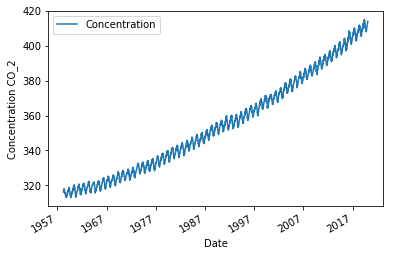

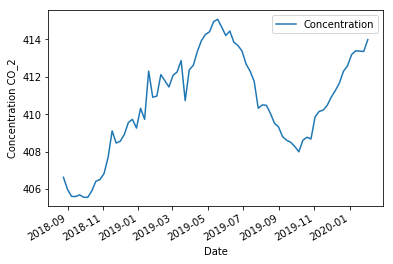

In [7]:
raw_data.plot("convert","Concentration")
plt.xlabel("Date")
plt.ylabel("Concentration CO_2")

raw_data[-75:].plot("convert","Concentration")
plt.xlabel("Date")
plt.ylabel("Concentration CO_2")

Nous utilisons un filtre pour faire un fit des données. Nous importons la fonction *signal* de *scipy* et utilisons le filtre *savgol*. Nous superposons les données et le fit sur le même graphique. Cela permet de voir l'évolution lente.

/opt/conda/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


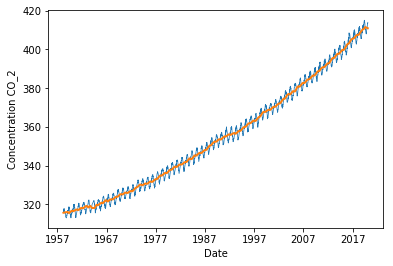

In [8]:
from scipy import signal

raw_data["smooth"]=signal.savgol_filter(raw_data['Concentration'], 57, 1)

fig, ax = plt.subplots()
ax.plot(raw_data["convert"],raw_data["Concentration"], linewidth=.75)
ax.plot(raw_data["convert"],raw_data["smooth"],linewidth=2)
plt.xlabel("Date")
plt.ylabel("Concentration CO_2")


plt.show()

Afin de pouvoir caractériser la période, nous ramenons les données autour de 0 en retirant aux données la courbe du fit obtenue avec l'utilisation du filtre *savgol*.

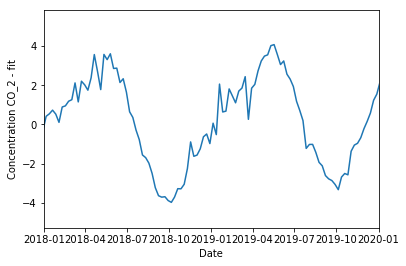

In [9]:
fig, ax = plt.subplots()
ax.plot(raw_data["convert"],raw_data["Concentration"]-raw_data["smooth"])
plt.xlabel("Date")
plt.ylabel("Concentration CO_2 - fit")
ax.set_xlim("2018-01-01",'2020-01-01')

plt.show()


Nous rappliquons le même filtre à ces nouvelles données pour avoir un signal plus facile à visualiser.

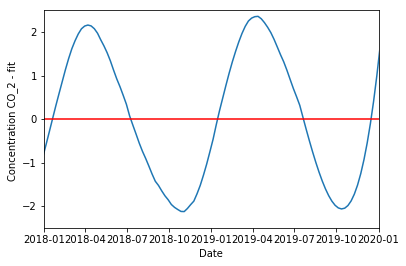

In [10]:
raw_data["smooth_b"]=signal.savgol_filter(raw_data["Concentration"]-raw_data["smooth"], 57, 3)

fig, ax = plt.subplots()
ax.plot(raw_data["convert"],raw_data["smooth_b"])
plt.axhline(y=0, color='r', linestyle='-')
ax.set_xlim("2018-01-01",'2020-01-01')
ax.set_ylim(-2.5,2.5)
plt.xlabel("Date")
plt.ylabel("Concentration CO_2 - fit ")

plt.show()

Visuellement nous remarquons que la période de l'oscillation est de plus ou moins un an et nous basons la suite de l'analyse sur cette supposition. On peut donc estimer la période plus facilement. Ne connaissant pas de moyen pour déterminer à l'aide du code et d'une fonction la période des données, nous utilisons les étapes suivantes:
- Le signal ressemble à un signal sinusoidal. De ce fait, nous savons que la période correspond au passage des données à la valeur 0 une fois sur deux.
- Nous affichons donc des barres verticales une fois sur deux, là où les données passent par zéro.
- Nous faisons une nouvelle inspection visuelle et remarquons que sur un zoom de deux ans le lieu de données égales à 0 passe aux alentour de juillet de l'année pour les deux années consécutives
- Nous confirmons que la période est proche de un an

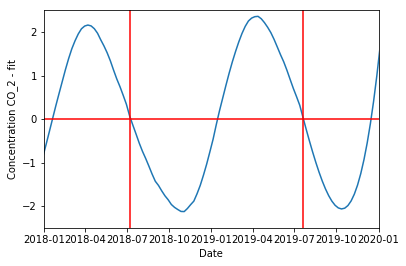

In [11]:
raw_data_period=[]
raw_data_date=[]
raw_data_value=[]

for i in range(len(raw_data["smooth_b"])):
    if abs(raw_data["smooth_b"][i])<=0.1:
        #print(i, raw_data["smooth_b"][i])
        #print(i, raw_data["convert"][i])
        raw_data_period.append(i)
        raw_data_date.append(raw_data["convert"][i])
        raw_data_value.append(raw_data["smooth_b"][i])


fig, ax = plt.subplots()
ax.plot(raw_data["convert"],raw_data["smooth_b"])
plt.axvline(x=raw_data_date[-1], color='r', linestyle='-')
plt.axvline(x=raw_data_date[-2], color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
ax.set_xlim("2018-01-01",'2020-01-01')
ax.set_ylim(-2.5,2.5)
plt.xlabel("Date")
plt.ylabel("Concentration CO_2 - fit")

plt.show()

Puisque l'indice des données correspond au nombre de semaines écoulées depuis le début des données, une autre méthode consisterait à récolter l'indice des données qui passent par 0. C'est ce qui est fait dans *raw_data_period*. Nous regardons le nombre de semaine moyen entre deux données consécutives passant par 0 et multiplions par 2 pour avoir la période. Cette méthode nous donne une réponse en nombre de semaine proche de la valeur de un an. 

In [12]:
raw_data_period_mean=[]

for i in range(len(raw_data_period)-1):
    raw_data_period_mean.append(raw_data_period[i+1]-raw_data_period[i])
    
print(raw_data_period_mean)
2.*np.mean(raw_data_period_mean)


[22, 23, 26, 26, 26, 26, 26, 25, 46, 1, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 47, 26, 24, 24, 24, 52, 27, 26, 26, 26, 26, 26, 51, 28, 27, 51, 26, 26, 51, 52, 52, 27, 25, 27, 26, 51, 53, 27, 26, 24, 24, 25, 26, 26, 26, 26, 25, 27, 26, 26, 26, 26, 25, 27, 79, 26, 25, 27, 25, 27, 26, 26, 26, 27, 24, 28, 26, 25, 26, 27, 25, 27, 25, 27, 25, 27, 25, 25, 25, 50, 24, 25, 51, 52, 52, 104, 27, 25, 51, 26, 26, 26, 25, 27, 78, 27, 24, 54]


57.81481481481482

Nous créons une nouvelle liste de date pour avoir des dates jusqu'en 2025. Nous définissons la pas de temps à 1 semaine en utilisans la fonction *timedelta*.

1958-03-29 00:00:00
1958-04-05 00:00:00
1958-04-12 00:00:00
1958-04-19 00:00:00
1958-04-26 00:00:00
1958-05-03 00:00:00
1958-05-17 00:00:00
1958-05-24 00:00:00
1958-07-05 00:00:00
1958-07-12 00:00:00
1958-07-19 00:00:00
1958-07-26 00:00:00
1958-08-02 00:00:00
1958-08-09 00:00:00
1958-08-16 00:00:00
1958-08-30 00:00:00
1958-09-06 00:00:00
1958-11-08 00:00:00
1958-11-15 00:00:00
1958-11-22 00:00:00
1958-11-29 00:00:00
1958-12-06 00:00:00
1958-12-13 00:00:00
1958-12-20 00:00:00
1958-12-27 00:00:00
1959-01-03 00:00:00
1959-01-10 00:00:00
1959-01-17 00:00:00
1959-01-24 00:00:00
1959-01-31 00:00:00
1959-02-14 00:00:00
1959-02-21 00:00:00
1959-02-28 00:00:00
1959-03-07 00:00:00
1959-03-21 00:00:00
1959-03-28 00:00:00
1959-04-04 00:00:00
1959-04-11 00:00:00
1959-04-18 00:00:00
1959-04-25 00:00:00
1959-05-02 00:00:00
1959-05-09 00:00:00
1959-05-16 00:00:00
1959-05-23 00:00:00
1959-06-06 00:00:00
1959-06-13 00:00:00
1959-06-20 00:00:00
1959-06-27 00:00:00
1959-07-04 00:00:00
1959-07-11 00:00:00


1985-02-02 00:00:00
1985-02-09 00:00:00
1985-02-16 00:00:00
1985-02-23 00:00:00
1985-03-02 00:00:00
1985-03-09 00:00:00
1985-03-16 00:00:00
1985-03-23 00:00:00
1985-03-30 00:00:00
1985-04-06 00:00:00
1985-04-13 00:00:00
1985-04-20 00:00:00
1985-04-27 00:00:00
1985-05-04 00:00:00
1985-05-11 00:00:00
1985-05-18 00:00:00
1985-05-25 00:00:00
1985-06-01 00:00:00
1985-06-08 00:00:00
1985-06-15 00:00:00
1985-06-22 00:00:00
1985-06-29 00:00:00
1985-07-06 00:00:00
1985-07-13 00:00:00
1985-07-20 00:00:00
1985-07-27 00:00:00
1985-08-10 00:00:00
1985-08-17 00:00:00
1985-08-24 00:00:00
1985-08-31 00:00:00
1985-09-07 00:00:00
1985-09-14 00:00:00
1985-09-21 00:00:00
1985-09-28 00:00:00
1985-10-05 00:00:00
1985-10-12 00:00:00
1985-10-19 00:00:00
1985-10-26 00:00:00
1985-11-02 00:00:00
1985-11-09 00:00:00
1985-11-16 00:00:00
1985-11-23 00:00:00
1985-11-30 00:00:00
1985-12-07 00:00:00
1985-12-14 00:00:00
1985-12-21 00:00:00
1985-12-28 00:00:00
1986-01-04 00:00:00
1986-01-11 00:00:00
1986-01-18 00:00:00


1997-05-17 00:00:00
1997-05-24 00:00:00
1997-05-31 00:00:00
1997-06-07 00:00:00
1997-06-14 00:00:00
1997-06-21 00:00:00
1997-06-28 00:00:00
1997-07-05 00:00:00
1997-07-12 00:00:00
1997-07-19 00:00:00
1997-07-26 00:00:00
1997-08-02 00:00:00
1997-08-09 00:00:00
1997-08-16 00:00:00
1997-08-23 00:00:00
1997-08-30 00:00:00
1997-09-06 00:00:00
1997-09-13 00:00:00
1997-09-20 00:00:00
1997-09-27 00:00:00
1997-10-04 00:00:00
1997-10-11 00:00:00
1997-10-18 00:00:00
1997-10-25 00:00:00
1997-11-01 00:00:00
1997-11-08 00:00:00
1997-11-15 00:00:00
1997-11-22 00:00:00
1997-11-29 00:00:00
1997-12-06 00:00:00
1997-12-13 00:00:00
1997-12-20 00:00:00
1997-12-27 00:00:00
1998-01-03 00:00:00
1998-01-10 00:00:00
1998-01-17 00:00:00
1998-01-24 00:00:00
1998-01-31 00:00:00
1998-02-07 00:00:00
1998-02-14 00:00:00
1998-02-21 00:00:00
1998-02-28 00:00:00
1998-03-07 00:00:00
1998-03-14 00:00:00
1998-03-21 00:00:00
1998-03-28 00:00:00
1998-04-04 00:00:00
1998-04-11 00:00:00
1998-04-18 00:00:00
1998-04-25 00:00:00


2011-08-06 00:00:00
2011-08-13 00:00:00
2011-08-20 00:00:00
2011-08-27 00:00:00
2011-09-03 00:00:00
2011-09-10 00:00:00
2011-09-17 00:00:00
2011-09-24 00:00:00
2011-10-01 00:00:00
2011-10-08 00:00:00
2011-10-15 00:00:00
2011-10-22 00:00:00
2011-10-29 00:00:00
2011-11-05 00:00:00
2011-11-12 00:00:00
2011-11-19 00:00:00
2011-11-26 00:00:00
2011-12-03 00:00:00
2011-12-10 00:00:00
2011-12-17 00:00:00
2011-12-24 00:00:00
2011-12-31 00:00:00
2012-01-07 00:00:00
2012-01-14 00:00:00
2012-01-21 00:00:00
2012-01-28 00:00:00
2012-02-04 00:00:00
2012-02-11 00:00:00
2012-02-18 00:00:00
2012-02-25 00:00:00
2012-03-03 00:00:00
2012-03-10 00:00:00
2012-03-17 00:00:00
2012-03-24 00:00:00
2012-03-31 00:00:00
2012-04-07 00:00:00
2012-04-14 00:00:00
2012-04-21 00:00:00
2012-04-28 00:00:00
2012-05-05 00:00:00
2012-05-12 00:00:00
2012-05-19 00:00:00
2012-05-26 00:00:00
2012-06-02 00:00:00
2012-06-09 00:00:00
2012-06-16 00:00:00
2012-06-23 00:00:00
2012-06-30 00:00:00
2012-07-07 00:00:00
2012-07-14 00:00:00


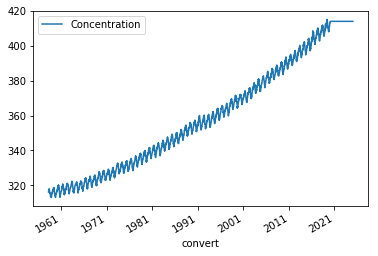

In [13]:
from datetime import timedelta
delta = timedelta(weeks=1)

date_convert=[]
date_extra=[]
concentration=[]

for i in range(len(raw_data["Concentration"])):
    concentration.append(raw_data["Concentration"][i])
    
for i in range(len(raw_data["convert"])):
    date_extra.append(raw_data["convert"][i])
    #print(date_extra[i])
    
for i in range(260):
    date_convert.append(raw_data["convert"][len(raw_data["convert"])-1]+delta*(i+1))
    #print(date_extra[i])


for i in range(len(date_convert)):
    date_extra.append(date_convert[i])

#date_convert=pd.Series(date_convert)    
    
for i in range(len(date_extra)):
    print(date_extra[i])
    
    
print(type(date_extra[0]))
print(type(raw_data["convert"]))

date_convert = pd.DataFrame({"convert":date_convert}) 

raw_data=raw_data.append(date_convert, ignore_index=True)

raw_data=raw_data.interpolate(method ='linear', limit_direction ='forward')

raw_data.plot("convert","Concentration")
    

Nous avons maintenant un liste qui contient une suite de date jusqu'un 2025 et nous allons l'tuiliser pour extrapoler les données. Nous ne sommes pas parvenu à trouver les focntions pour exrrapoler correctement els données, nous ne pouvons aller plus loin. 